In [ ]:
from google.colab import files
from tensorflow.keras.models import load_model

# 📁 Upload your local model file
print("➡️ Please upload your gtsrb_model.h5 file:")
uploaded = files.upload()  # opens file picker

# ✅ Load the model from uploaded file
model_path = list(uploaded.keys())[0]  # get uploaded filename
model = load_model(model_path)
print(f"✅ Model loaded successfully from: {model_path}")


➡️ Please upload your gtsrb_model.h5 file:


Saving traffic_sign_classifier_v7.0_e30_b8.h5 to traffic_sign_classifier_v7.0_e30_b8.h5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


✅ Model loaded successfully from: traffic_sign_classifier_v7.0_e30_b8.h5



Upload an image (or press Cancel / close dialog to quit)...


Saving 00220.png to 00220.png


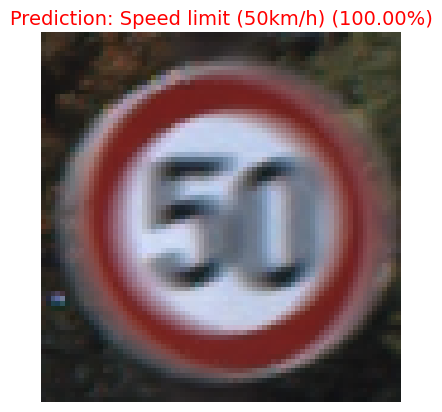


Upload an image (or press Cancel / close dialog to quit)...


Saving 01199.png to 01199.png


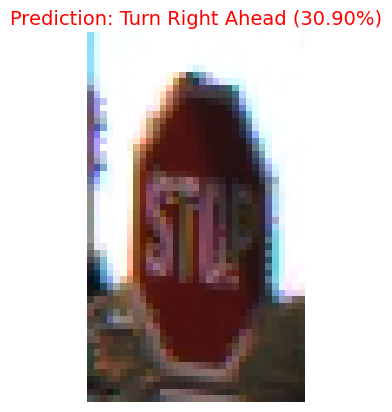


Upload an image (or press Cancel / close dialog to quit)...


Saving 01214.png to 01214.png


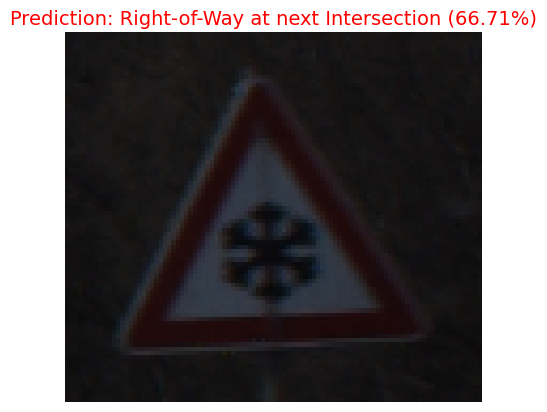


Upload an image (or press Cancel / close dialog to quit)...


Saving 00006.png to 00006 (1).png


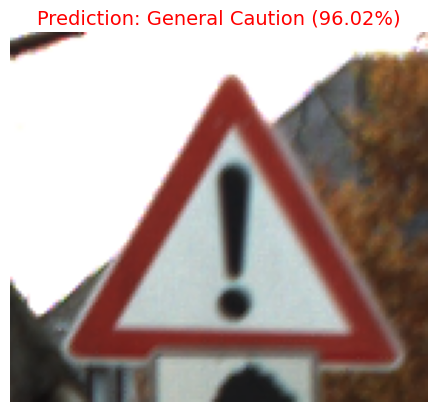


Upload an image (or press Cancel / close dialog to quit)...


Saving 00014.png to 00014.png


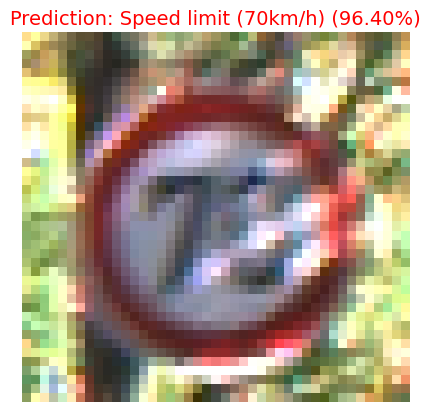


Upload an image (or press Cancel / close dialog to quit)...


Saving 00111.png to 00111.png


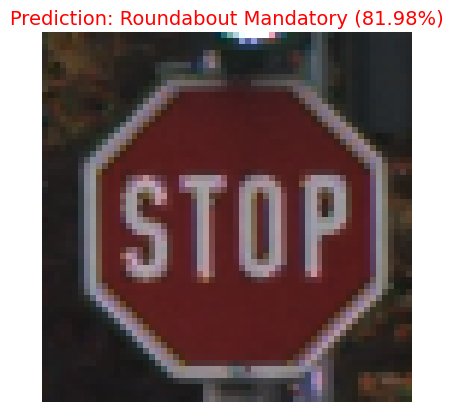


Upload an image (or press Cancel / close dialog to quit)...


Saving 00504.png to 00504.png


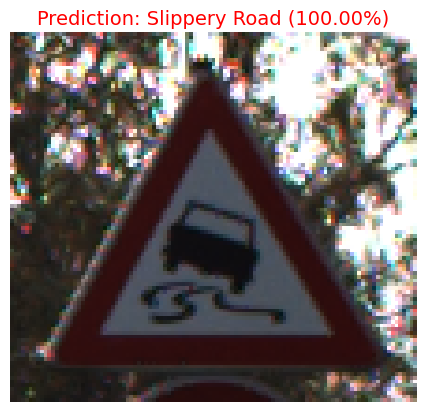


Upload an image (or press Cancel / close dialog to quit)...


Saving 01000.png to 01000.png


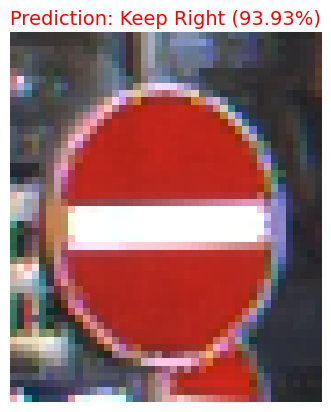


Upload an image (or press Cancel / close dialog to quit)...


Saving 01090.png to 01090.png


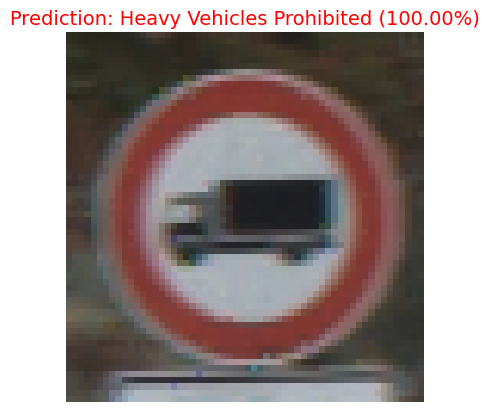


Upload an image (or press Cancel / close dialog to quit)...


In [ ]:
import numpy as np
from keras import models
from skimage import transform, exposure
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

def image_processing(image):
    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)
    image = image.astype("float32") / 255.0
    return image

def getClassName(classNo):
    classes = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)',
               'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)',
               'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)',
               'No Overtaking', 'No Overtaking for Heavy Vehicles', 'Right-of-Way at next Intersection',
               'Priority Road', 'Yield', 'Stop', 'No Vehicles', 'Heavy Vehicles Prohibited',
               'No Entry', 'General Caution', 'Dangerous Left Curve', 'Dangerous Right Curve',
               'Double Curve', 'Bumpy Road', 'Slippery Road', 'Narrowing Road', 'Road Work',
               'Traffic Signals', 'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of Limits',
               'Turn Right Ahead', 'Turn Left Ahead', 'Ahead Only', 'Go Straight or Right',
               'Go Straight or Left', 'Keep Right', 'Keep Left', 'Roundabout Mandatory',
               'End of No Overtaking', 'End of No Overtaking for Heavy Vehicles']
    return classes[classNo]

def classify_image(image_path, model):
    image = Image.open(image_path).convert('RGB')
    image_np = np.array(image)
    processed_image = image_processing(image_np)
    processed_image = processed_image.reshape(1, 32, 32, 3)
    prediction = model.predict(processed_image, verbose=0)
    class_idx = np.argmax(prediction)
    probability = np.amax(prediction)
    class_name = getClassName(class_idx)
    return class_idx, class_name, probability, image_np



# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    class_idx, class_name, prob, image_np = classify_image(filename, model)
    plt.imshow(image_np)
    plt.title(f"Prediction: {class_name} ({prob*100:.2f}%)", fontsize=14, color='red')
    plt.axis('off')
    plt.show()
